## Implementation

In [55]:
class Node:
    
    def __init__(self,data):
        self.data = data
        self.next = None

class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
    
    def traverse(self):
        if self.head is None:
            print('Linked List is empty')
        else:
            node = self.head
            while node is not None:
                print(node.data)
                node = node.next

    def count(self):
        node = self.head
        count = 0
        while node is not None:
            count +=1
            node = node.next
        return count
    
    def append(self,node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node
    
    def create_ll(self,a):
        for num in a:
            self.append(Node(num))
        
    def delete_by_value(self,x):
        if self.head is None:
            return
        
        node = self.head
        prev = None
        while node is not None:
            if node.data == x:
                break
            prev = node
            node = node.next
        
        if not node:
            return
        
        if self.head == node:
            self.head = node.next
            
        if self.tail == node:
            self.tail = prev
        
        if prev is not None:
            prev.next = node.next
        
        return
            
    def get(self,n):
        node = self.head
        i = 1
        while i!=n and node is not None:
            i += 1
            node = node.next
        if node is None:
            print('Index out of bounds')
            return
        return node.data

In [59]:
ll = LinkedList()
ll.create_ll([1,2,3,4])
ll.traverse()
print()
ll.delete_by_value(1)
ll.traverse()

1
2
3
4

2
3
4


### You are given a Linked List with nodes that have values 0, 1 or 2. Sort the linked list. For example,

* Input: 1 -> 0 -> 2 -> 1 -> 2 -> 1 
* Output: 0 -> 1 -> 1 -> 1 -> 2 -> 2

In [4]:
def sorted_list(ll):
    ll0 = LinkedList()
    ll1 = LinkedList()
    ll2 = LinkedList()
    
    node = ll.head
    while node is not None:
        if node.data == 0:
            ll0.append(node)
        elif node.data == 1:
            ll1.append(node)
        elif node.data == 2:
            ll2.append(node)
        else:
            print('Invalid value {}'.format(node.data))
            return
        node = node.next
        
    result = LinkedList()
    
    if ll0.head is not None:
        result.append(ll0.head)
        result.tail = ll0.tail
    if ll1.head is not None:
        result.append(ll1.head)
        result.tail = ll1.tail
    if ll2.head is not None:
        result.append(ll2.head)
        result.tail = ll2.tail
        
    result.tail.next = None
    return result

In [5]:
ll = LinkedList()
ll.create_ll([1,2,1,0,2,1,0])
result = sorted_list(ll)
result.traverse()

0
0
1
1
1
2
2


### Odd Even Linked List: Given a Linked List L, separate it into 2 Linked Lists.One contains L's odd nodes and the other contains L's even nodes. For example:
* Input: Head -> 1 -> 2 -> 3 -> 4 -> 5
* Result 1: Head -> 1 -> 3 -> 5
* Result 2: Head -> 2 -> 4
* Note: Odd and Even here refer to the node's position, not value

In [6]:
def odd_even(ll):
    odd = LinkedList()
    even = LinkedList()
    
    index = 0
    node = ll.head
    
    while node is not None:
        index += 1
        if index%2==0:
            even.append(node)
        else:
            odd.append(node)
        node = node.next
        
    if odd.head is not None:
        odd.tail.next = None
    if even.head is not None:
        even.tail.next = None
    
    return (odd, even)

In [7]:
ll = LinkedList()
ll.create_ll([1,2,4,7,3])
odd, even = odd_even(ll)
odd.traverse()
print()
even.traverse()

1
4
3

2
7


### Partition List
Given a linked list and a value x, partition it such that all nodes less than x come before nodes greater than or equal to x.

You should preserve the original relative order of the nodes in each of the two partitions.

Example:

Input: head = 1->4->3->2->5->2, x = 3
Output: 1->2->2->4->3->5

In [2]:
class Solution:
    def partition(self, head, x: int):
        if head is None: return head
        l1 = LinkedList()
        l2 = LinkedList()
        node = head
        while node:
            next_node = node.next
            if node.val < x:
                l1.append(node)
            else:
                l2.append(node)
            node = next_node
        
        if l1.head:
            l1.tail.next = l2.head
        
        return l1.head if l1.head else l2.head
        
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node
        node.next = None

### Remove Duplicate from sorted list
* Input: 1->1->2->3->3
* Output: 1->2->3

In [2]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def deleteDuplicates(self, head: ListNode) -> ListNode:
        if head is None:
            return head
        ll = LinkedList()
        node = head
        while node:
            if ll.head is None or ll.tail.val < node.val:
                ll.append(node)
            node = node.next
        ll.tail.next = None
        return ll.head
    
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self,node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node

### Merge two sorted lists


In [4]:
class Solution:
    def mergeTwoLists(l1, l2):
        node1 = l1; node2 = l2; ll = LL()
        while node1 and node2:
            if node1.val<=node2.val:
                ll.append(node1)
                node1 = node1.next
            else:
                ll.append(node2)
                node2 = node2.next
        
        node = node1 if node1 else node2
        while node:
            ll.append(node)
            node = node.next
        return ll.head

class LL:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, node):
        if not self.head:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node

### Add two numbers
You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

* Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)
* Output: 7 -> 0 -> 8
* Explanation: 342 + 465 = 807.

In [1]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        carry = 0
        node1, node2 = l1, l2
        result = LinkedList()
        while node1 or node2:
            val1, val2 = 0,0
            if node1:
                val1 = node1.val
                node1 = node1.next
            if node2:
                val2 = node2.val
                node2 = node2.next
            sum = carry + val1 + val2
            unit = sum%10
            carry = sum//10
            result.append(ListNode(unit))
        
        if carry > 0:
            result.append(ListNode(carry))
        return result.head
        
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node

### Leetcode 708 - Insert into a Cyclic Sorted List
Refer Leetcode for solution

### Given a linked list and pointers to a node N and its previous node Prev, delete N from the linked list

In [8]:
def delete(ll,to_delete,prev):
    if ll.head == to_delete:
        ll.head = to_delete.next
    
    if ll.tail == to_delete:
        ll.tail = prev
        
    if prev is not None:
        prev.next = to_delete.next

ll = LinkedList()
node1, node2, node3, node4, node5 = Node(3), Node(1), Node(7), Node(2), Node(5)
ll.append(node1) ;ll.append(node3) ;ll.append(node2) ;ll.append(node4) ;ll.append(node5)
ll.traverse()
print()
        
delete(ll,node1,None)
ll.traverse()

3
7
1
2
5

7
1
2
5


### Follow Up: Given a node N in a Linked List, can you delete it without the previous node in O(1) time?

In [9]:
def delete_without_prev(ll,node):
    if node.next is None:
        return
    node.data = node.next.data
    delete(ll,node.next,node)

ll = LinkedList()
node1, node2, node3, node4, node5 = Node(3), Node(1), Node(7), Node(2), Node(5)
ll.append(node1) ;ll.append(node3) ;ll.append(node2) ;ll.append(node4) ;ll.append(node5)
ll.traverse()
print()

delete_without_prev(ll,node4)
ll.traverse()


3
7
1
2
5

3
7
1
5


### Intersection of Two Linked Lists
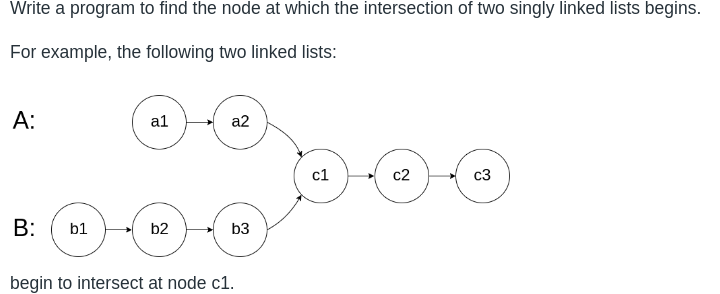

In [3]:
 def getIntersectionNode(headA, headB):
        node1 = headA; node2 = headB
        while node1 != node2:
            node1 = headB if node1 is None else node1.next
            node2 = headA if node2 is None else node2.next
        return node1

## Slow Pointer , Fast Pointer Technique

### Find if a Linked List has a cycle

In [5]:
def has_cycle(ll):
    fast, slow = ll.head, ll.head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        if slow == fast:
            return True
    return False

In [6]:
ll = LinkedList()
node1, node2, node3, node4, node5 = Node(1), Node(2), Node(3), Node(4), Node(5)
ll.append(node1) ;ll.append(node2) ;ll.append(node3) ;ll.append(node4) ;ll.append(node5)
node5.next = node2

has_cycle(ll)

True

### Happy Number
Write an algorithm to determine if a number is "happy".

A happy number is a number defined by the following process: Starting with any positive integer, replace the number by the sum of the squares of its digits, and repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1. Those numbers for which this process ends in 1 are happy numbers.

Example: 

* Input: 19
* Output: true
* Explanation: 
* 12 + 92 = 82
* 82 + 22 = 68
* 62 + 82 = 100
* 12 + 02 + 02 = 1

In [33]:
def isHappy(n):
    slow = fast = n
    while True:
        slow = find_square(slow)
        fast = find_square(find_square(fast))
        if fast == slow:
            return slow == 1

def find_square(n):
    return sum([int(i)**2 for i in str(n)])

isHappy(19)

True

### Find the length of the cycle

In [24]:
def find_length_cycle(ll):
    slow = fast = ll.head; found = False
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        if slow == fast:
            found = True
            break
    if not found:
        return 0

    node = slow.next
    length = 1
    while node!=slow:
        node = node.next
        length += 1
    return length

In [25]:
ll = LinkedList()
node1, node2, node3, node4, node5 = Node(1), Node(2), Node(3), Node(4), Node(5)
ll.append(node1) ;ll.append(node2) ;ll.append(node3) ;ll.append(node4) ;ll.append(node5)
node5.next = node3

find_length_cycle(ll)

3

### Given a Linked List with a cycle, find the node where the cycle begins.

In [26]:
def find_start(ll):
    length = self.find_length_cycle(ll)
    if length == 0:
        return None
    node1 = node2 = head
    for i in range(length):
        node2 = node2.next
    while node1!=node2:
        node1 = node1.next
        node2 = node2.next
    return node1

In [21]:
ll = LinkedList()
node1, node2, node3, node4, node5 = Node(1), Node(2), Node(3), Node(4), Node(5)
ll.append(node1) ;ll.append(node2) ;ll.append(node3) ;ll.append(node4) ;ll.append(node5)
node5.next = node2
find_start(ll).data

2

### Find the median node of a linked list.
For example:1 -> 2 -> 3 -> 4 -> 5      Median node is 3

In [5]:
def find_median(ll):
    fast, slow = ll.head, ll.head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
    return slow

ll = LinkedList()
ll.create_ll([1,2])
find_median(ll).data

2

### Find the 3rd to last element in a given linked list.

In [13]:
def k_tolast(ll,k):
    fast, slow = ll.head, ll.head
    for i in range(k):
        try:
            fast = fast.next
        except:
            print('Invalid Index')
            return
    while fast:
        fast = fast.next
        slow = slow.next
    return slow.data

ll = LinkedList()
ll.create_ll([1,2,3,4,5])
k_tolast(ll,3)

3

### Remove nth node from end

In [16]:
def removeNthFromEnd(ll, n):
    fast = slow = ll.head; prev = None
    for _ in range(n):
        fast = fast.next
    while fast:
        fast = fast.next
        prev = slow
        slow = slow.next
    if not prev: ll.head = ll.head.next
    else:prev.next = slow.next
    return ll

ll = LinkedList()
ll.create_ll([1,2,3,4,5])
new_ll = removeNthFromEnd(ll, 5)
new_ll.traverse()

2
3
4
5


## Reverse a Linked List

In [45]:
def reverse_ll(ll):
    ll.tail = ll.head
    prev = None
    curr = ll.head
    while curr is not None:
        next = curr.next
        curr.next = prev
        prev = curr
        curr = next
    ll.head = prev

ll = LinkedList()
ll.create_ll([1,2,3,4])
reverse_ll(ll)
ll.traverse()

4
3
2
1


### Reverse a sublist
Reverse a linked list from position m to n. Do it in one-pass.

Note: 1 ≤ m ≤ n ≤ length of list.

Example:

* Input: 1->2->3->4->5->NULL, m = 2, n = 4
* Output: 1->4->3->2->5->NULL


In [5]:
def reverseBetween(head, m, n):
    if not head or m == n:
        return head
    i = 1; current = head; prev = None
    while current and i<m:
        prev = current
        current = current.next
        i += 1

    last_node_of_first_part = prev
    last_node_of_sublist = current
    prev=None
    while current and i<n+1:
        next = current.next
        current.next = prev
        prev = current
        current = next
        i += 1
    if last_node_of_first_part is not None:
        last_node_of_first_part.next = prev
    else:
        head = prev
    last_node_of_sublist.next = current

    return head

### Reverse Nodes in K groups
Given a linked list, reverse the nodes of a linked list k at a time and return its modified list.

k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes in the end should remain as it is.

Example:

* Given this linked list: 1->2->3->4->5
* For k = 2, you should return: 2->1->4->3->5
* For k = 3, you should return: 3->2->1->4->5

In [6]:
def reverseKGroup(head, k):
    if not head or k<=1:
        return head
    length = 0
    node = head
    while node:
        length += 1
        node = node.next

    prev = None; curr = head; processed = 0
    while True:
        if processed + k>length:
            return head

        last_node_of_previous_list = prev
        last_node_of_sublist = curr
        i = 0
        while curr and i<k:
            next = curr.next
            curr.next = prev
            prev = curr
            curr = next
            i += 1
        if last_node_of_previous_list is None:
            head = prev
        else:
            last_node_of_previous_list.next = prev
        last_node_of_sublist.next = curr
        prev = last_node_of_sublist
        processed += k

### Rotate a LinkedList

Given a linked list, rotate the list to the right by k places, where k is non-negative.

Example 1:

* Input: 1->2->3->4->5->NULL, k = 2
* Output: 4->5->1->2->3->NULL

Explanation:
* rotate 1 steps to the right: 5->1->2->3->4->NULL
* rotate 2 steps to the right: 4->5->1->2->3->NULL

In [5]:
def rotateRight(head, k):
    if not head: return head
    length = 0; node = head
    while node:
        length += 1
        tail = node
        node = node.next

    k = k%length
    if k == 0: return head
    i = 1; node = head
    while node and i!=length-k:
        node = node.next
        i+=1
    newhead = node.next; node.next = None; tail.next = head
    return newhead

### Check if a Linked List is a palindrome

In [76]:
def isPalindrome(head):
    if head is None or head.next is None:
        return True
    slow = fast = head
    while fast and fast.next:
        fast = fast.next.next
        prev = slow
        slow = slow.next
    prev.next = None
    new_head = self.reverse(slow)
    while head:
        if new_head.val!=head.val:
            return False
        new_head = new_head.next
        head = head.next
    return True 

def reverse(node):
    prev = None
    while node:
        next = node.next
        node.next = prev
        prev = node
        node = next
    return prev

In [77]:
ll = LinkedList()
ll.create_ll([1])
isPalindrome(ll.head)

True

### Reorder a LinkedList
Given a singly linked list L: L0→L1→…→Ln-1→Ln,

reorder it to: L0→Ln→L1→Ln-1→L2→Ln-2→…

You may not modify the values in the list's nodes, only nodes itself may be changed.

Example 1:

Given 1->2->3->4, reorder it to 1->4->2->3.

In [ ]:
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
        self.tail = node
        
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if head is None or head.next is None:
            return
        ll = LinkedList()
        slow = fast = head
        while fast and fast.next:
            fast = fast.next.next
            prev = slow
            slow = slow.next
        prev.next = None
        new_head = self.reverse(slow)
        while head:
            ll.append(head)
            head = head.next
            ll.append(new_head)
            new_head = new_head.next
        
    def reverse(self, head):
        prev = None
        while head:
            next_ = head.next
            head.next = prev
            prev = head
            head = next_
        return prev

### Copy List With Random Pointer

In [8]:
class Solution:
    def copyRandomList(self, head: 'Node') -> 'Node':
        if not head:
            return
        self.visited = {}
        return self.dfs(head) 
    
    def dfs(self, node):
        if not node:
            return
        if node in self.visited:
            return self.visited[node]
        new_node = Node(node.val, None, None)
        self.visited[node] = new_node
        new_node.next = self.dfs(node.next)
        new_node.random = self.dfs(node.random)
        return new_node

### Flatten a multilevel double LinkedList
Input:

                     1---2---3---4---5---6--NULL
                             |
                             7---8---9---10--NULL
                                 |
                                 11--12--NULL

Output:

            1-2-3-7-8-11-12-9-10-4-5-6-NULL

In [1]:
# Definition for a Node.
class Node:
    def __init__(self, val, prev, next, child):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child
        
class Solution:
    def flatten(self, head: 'Node') -> 'Node':
        if not head: return
        stack = [head]; prev = Node(0,None,None,None)
        while stack:
            node = stack.pop()
            prev.next = node
            node.prev = prev
            if node.next:
                stack.append(node.next) 
                node.next = None
            if node.child:
                stack.append(node.child)
                node.child = None
            prev = node
        head.prev = None
        return head

## Implement LRU Cache

In [60]:
class Node:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
        self.prev = None
        
class LRUCache:

    def __init__(self, capacity: int):
        self.map = {}
        self.head = None
        self.tail = None
        self.capacity = capacity

    def get(self, key: int) -> int:
        if key not in self.map:
            return -1
        node = self.map[key]
        self.remove_from_ll(node)
        self.append_to_ll(node)
        return node.value

    def put(self, key: int, value: int) -> None:
        if key in self.map:
            node = self.map[key]
            node.value = value
            self.remove_from_ll(node)
            self.append_to_ll(node)   
        else:
            node = Node(key, value)
            if len(self.map) == self.capacity:
                head_node = self.map[self.head.key]
                del self.map[self.head.key]
                self.remove_from_ll(head_node)
            self.append_to_ll(node)
            self.map[key] = node
    
    def append_to_ll(self, node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
            node.prev = self.tail
        self.tail = node
    
    def remove_from_ll(self, node):
        if node.next is not None:
            node.next.prev = node.prev
        if node.prev is not None:
            node.prev.next = node.next
        if node == self.head:
            self.head = node.next
        if node == self.tail:
            self.tail = node.prev
        node.next = None
        node.prev = None
            
    def print_cache(self):
        if self.head is None:
            print('Cache is empty')
            return
        node = self.head
        while node is not None:
            print(node.key)
            node = node.next


In [61]:
cache = LRUCache(5)
cache.put('a', 1)
cache.put('b',2)
cache.put('c',10)
cache.get('b')
cache.print_cache()

a
c
b


In [62]:
cache.put('x',3)
cache.print_cache()

a
c
b
x


In [63]:
cache.put('k', 15)
cache.print_cache()

a
c
b
x
k


In [64]:
cache.get('b')
cache.print_cache()

a
c
x
k
b


In [65]:
cache.put('x', 4)
cache.print_cache()

a
c
k
b
x


In [66]:
cache.put('z', 100)
cache.print_cache()

c
k
b
x
z


## Build a word iterator

In [24]:
class word_index:
    def __init__(self,word,index):
        self.word = word
        self.index = index
    
class word_iterator:
    def __init__(self,string):
        self.string = string
        self.position = 0
        self.get_next_alpha()
    
    def get_next_alpha(self):
        while self.position < len(self.string) and not self.string[self.position].isalpha():
            self.position += 1
    
    def has_next(self):
        return self.position < len(self.string)
    
    def next(self):
        if not self.has_next():
            return None
        start_index = self.position
        while self.position < len(self.string) and self.string[self.position].isalpha():
            self.position += 1
        end_index = self.position - 1
        self.get_next_alpha()
        return word_index(self.string[start_index:end_index+1], start_index)

## Implement a double Linked List

In [25]:
class Node:
    def __init__(self,word,index):
        self.word = word
        self.index = index
        self.prev = None
        self.next = None
        
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self,node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
            node.prev = self.tail
        self.tail = node
        
    def delete(self,node):
        if node.next is not None:
            node.next.prev = node.prev
        if node.prev is not None:
            node.prev.next = node.next
        if self.head == node:
            self.head = node.next
        if self.tail == node:
            self.tail = node.prev

## Smallest Subarray Covering All Values:
Let's say you are given a large text document Doc and you don't want to store the entire document in memory. You are also given a set S of words. You want to find the smallest substring of Doc that contains all the words in S. For example:

S: **["and", "of", "one"]**

Doc: "a set of words that is complete in itself, typically containing a subject and predicate, conveying a statement, question, exclamation, or command, and consisting **of a main clause and sometimes one** or more subordinate clauses"

The underlined part above is the solution. Note that the order in which the words appear doesn't matter. Also, the length of the substring is in terms of number of characters.

In [34]:
def smallest_subarray(doc, wordset):
    result = None
    ll = LinkedList()
    hashmap = {}
    iterator = word_iterator(doc)
    while iterator.has_next():
        wi = iterator.next()
        word = wi.word
        if word not in wordset:
            continue
        
        if word in hashmap:
            to_delete = hashmap[word]
            del hashmap[word]
            ll.delete(to_delete)
        
        node = Node(word, wi.index)
        hashmap[word] = node
        ll.append(node)
        
        if len(hashmap) == len(wordset):
            start_index = ll.head.index
            end_index = ll.tail.index + len(ll.tail.word) - 1
            length = end_index - start_index + 1
            if result is None or length < len(result):
                result = doc[start_index : end_index+1]
    return result

In [33]:
doc = 'a set of words that is complete in itself, typically containing a subject and predicate, conveying a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses'
wordset = {"and", "of", "one"}
smallest_subarray(doc, wordset)

'of a main clause and sometimes one'

In [30]:
doc = "one of the car and bike and one of those"
wordset = {"and", "of", "one"}
smallest_subarray(doc,wordset)

'and one of'

### All O one Data Structure    
Implement a data structure supporting the following operations:

* Inc(Key) - Inserts a new key with value 1. Or increments an existing key by 1. Key is guaranteed to be a non-empty string.
* Dec(Key) - If Key's value is 1, remove it from the data structure. Otherwise decrements an existing key by 1. If the key does not exist, this function does nothing. Key is guaranteed to be a non-empty string.
* GetMaxKey() - Returns one of the keys with maximal value. If no element exists, return an empty string "".
* GetMinKey() - Returns one of the keys with minimal value. If no element exists, return an empty string "".


In [45]:
class AllOne:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.hashmap = {}
        self.ll = LinkedList()
        

    def inc(self, key):
        """
        Inserts a new key <Key> with value 1. Or increments an existing key by 1.
        """
        if key not in self.hashmap:
            node = Node(key, 1)
            self.ll.insert_head(node)
            self.hashmap[key] = node
        else:
            oldNode = self.hashmap[key]
            newNode = Node(key, oldNode.freq+1)
            self.ll.insert(newNode)
            self.ll.remove(oldNode)
            self.hashmap[key] = newNode
        

    def dec(self, key):
        """
        Decrements an existing key by 1. If Key's value is 1, remove it from the data structure.
        """
        if key not in self.hashmap:
            return
        oldNode = self.hashmap[key]
        if oldNode.freq == 1:
            self.ll.remove(oldNode)
            del self.hashmap[key]
        else:
            newNode = Node(key, oldNode.freq-1)
            self.ll.insert(newNode)
            self.ll.remove(oldNode)
            self.hashmap[key] = newNode 
        

    def getMaxKey(self):
        """
        Returns one of the keys with maximal value.
        """
        return self.ll.tail.key if self.ll.tail else ''

    def getMinKey(self):
        """
        Returns one of the keys with Minimal value.
        """
        return self.ll.head.key if self.ll.head else ''
        
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, node):
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
            node.prev = self.tail
        self.tail = node
        
    def insert_head(self,node):
        if self.head is None:
            self.append(node)
            return
        self.head.prev = node
        node.next = self.head
        self.head = node
        
    def insert(self, node):
        if self.head is None or node.freq >= self.tail.freq:
            self.append(node)
        elif node.freq <= self.head.freq:
            self.insert_head(node)
        else:
            curr = self.head
            while curr.freq < node.freq:
                curr = curr.next
            curr.prev.next = node
            node.prev = curr.prev
            node.next = curr
            curr.prev = node      
        
    def remove(self, node):
        if node.prev is not None:
            node.prev.next = node.next
        if node.next is not None:
            node.next.prev = node.prev
        if node == self.head:
            self.head = node.next
        if node == self.tail:
            self.tail = node.prev
    
    def print(self):
        node = self.head
        while node:
            print(node.key, node.freq)
            node = node.next
        
class Node:
    def __init__(self, key, freq):
        self.key = key
        self.freq = freq
        self.next = None
        self.prev = None

In [46]:
ds = AllOne()
ds.inc('hello')
ds.inc('goodbye')
ds.inc('hello')
ds.inc('hello')
ds.inc('leet')
ds.ll.print()

leet 1
goodbye 1
hello 3


In [47]:
ds.inc('code')
ds.ll.print()

code 1
leet 1
goodbye 1
hello 3


In [48]:
ds.inc('leet')
ds.ll.print()

code 1
goodbye 1
leet 2
hello 3


In [49]:
ds.dec('hello')
ds.ll.print()

code 1
goodbye 1
hello 2
leet 2


In [50]:
ds.inc('leet')
ds.ll.print()

code 1
goodbye 1
hello 2
leet 3


In [51]:
ds.inc('code')
ds.inc('code')
ds.ll.print()

goodbye 1
hello 2
leet 3
code 3


### First Unique Number 
You have a queue of integers, you need to retrieve the first unique integer in the queue.

Implement the FirstUnique class:

* FirstUnique(int[] nums) Initializes the object with the numbers in the queue.
* int showFirstUnique() returns the value of the first unique integer of the queue, and returns -1 if there is no such integer.
* void add(int value) insert value to the queue.

In [3]:
from collections import OrderedDict
class FirstUnique:

    def __init__(self, nums):
        self.q = OrderedDict()
        self.is_unique = {}
        for num in nums:
            self.add(num)
        
    def showFirstUnique(self) -> int:
        if len(self.q) == 0:
            return -1
        for num in self.q:
            return num
        
    def add(self, value: int) -> None:
        if value not in self.is_unique:
            self.is_unique[value] = True
            self.q[value] = None
        elif self.is_unique[value]:
            self.is_unique[value] = False
            self.q.pop(value)
            
obj = FirstUnique([2,3,5])
obj.add(2)
obj.add(3)
obj.showFirstUnique()

5